In [1]:
# This cell expands the cells of the notebook to the width of the window
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Week 5

## Python setup

In [13]:
%%capture
pip install fa2_modified

     ------------------------------------ 474.3/474.3 kB 237.6 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for fa2_modified: filename=fa2_modified-0.3.10-cp39-cp39-win_amd64.whl size=178549 sha256=39ef245cada8be7019de5b50ad12e050172532661fec9d146d45c6198dd6ee50
  Stored in directory: c:\users\aleksandar lukic\appdata\local\pip\cache\wheels\65\16\9d\83ddc65e20873f4e0d8fef375e54e878cbc7a7246690e44f0b
Successfully built fa2_modified
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: c:\python39\python.exe -m pip install --upgrade pip


In [14]:
from fa2_modified import ForceAtlas2
import json
import math
import matplotlib as mpl
from matplotlib import colormaps
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import pickle
import random
import re
import urllib.request

## Exercises Part A: Visualizations

In this section, we are introduced to the library [ForceAtlas2 (_Modified version)_](https://github.com/AminAlam/fa2_modified). The library is a more powerful alternative to the networkX library and can help create better visualisations.

In [3]:
# Folder to store the text files
cwd = os.getcwd()
folder_name = "saved_graphs"
folder_path = os.path.join(cwd, folder_name)
folder_path

'C:\\Users\\Aleksandar Lukic\\School\\02805_Social_Graphs_and_Interactions\\Exercise_solutions\\saved_graphs'

In [28]:
# Create file path
file_path = os.path.join(folder_path, "country_musicians.gexf")

In [29]:
# load graph object from file
G = nx.read_gexf(file_path)

# Test similarity:
print(G)

Graph with 2003 nodes and 14229 edges


### A.1 Plot the Network using ForceAtlas2

Below is the code taken from the example in the documentation:

In [16]:
fa2 = ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution=True,  # Dissuade hubs
    linLogMode=False,  # NOT IMPLEMENTED
    adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
    edgeWeightInfluence=1.0,

    # Performance
    jitterTolerance=1.0,  # Tolerance
    barnesHutOptimize=True,
    barnesHutTheta=1.2,
    multiThreaded=False,  # NOT IMPLEMENTED

    # Tuning
    scalingRatio=2.0,
    strongGravityMode=False,
    gravity=1.0,

    # Log
    verbose=True)

In [30]:
positions = fa2.forceatlas2_networkx_layout(G, pos=None, iterations=2000)

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [03:23<00:00,  9.85it/s]

BarnesHut Approximation  took  21.77  seconds
Repulsion forces  took  175.71  seconds
Gravitational forces  took  0.41  seconds
Attraction forces  took  0.62  seconds
AdjustSpeedAndApplyForces step  took  2.13  seconds


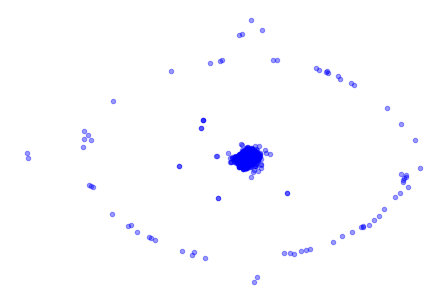

In [35]:
# nx.draw_networkx_nodes(G, positions, node_size=20, node_color="blue", alpha=0.4)
# nx.draw_networkx_edges(G, positions, edge_color="green", alpha=0.1)

nx.draw(
    G,
    pos=positions,
    node_size=20,
    node_color="blue",
    alpha=0.4,
    width=0.1,
    edge_color="green",
    with_labels=False
)

plt.axis('off')
plt.show()

Exercise 2: We continue with a qualitative inspection of the Wikipedia pages. Inspecting the data manually will develop intuitions that will help us to intepret our quantitative results. We investigate the reasons for links between characters to exist on Wikipedia.

## Part B

Exercise 3: Last time we visually analyzed (plotted) the degree distributions of our network. Now, let's analyze it using some of the tools from previous lectures. For this exercise we are going to look at the directed graph (rememeber, we asked you to keep one?).

1.What are the average, median, mode, minimum and maximum value of the in-degree? And of the out-degree? How do you intepret the results?

Exercise 4: Centralities, assortativity and more.

1.Find the 5 most central characters according to degree centrality.

2.Find the 5 most central characters according to betweenness centrality.

3.Find the 5 most central characters according to eigenvector centrality. Calculate centrality corresponding to both in- and out-edges (see NetworkX documentation for details).

4.Plot the betweenness centrality of nodes vs their degree centrality. Is there a correlation between the two? Did you expect that? Why?

5.Is the undirected version of the graph assortative with respect to degree? (e.g. do high-degree characters tend to link to other high-degree characters, and low-degree characters to other low-degree characters?). Provide an interpretation of your answer.

6.Is the undirected version of the graph assortative with respect do the length_of_content nodal properties? e.g. do characters with long Wikipedia pages tend to link to other charakters with long Wiki-pages, and vice versa?

7.What is the average shortest path length? Is it similar to the one of a random graph with the same number of nodes N and probablity of connection p?

## Part C

Exercise 5: Visualizing the Network Backbone

1.Extract the network backbone for both Weighted Network 1 and 2. You can implement it yourself based on the scientific paper or find an implentation on GitHub (there are several ones to choose from ... I like this implementation, which also includes other interesting edge filters). Figure out how your particular backbone extractor works (you may have to inspect the code itself, these packages are not always well documented). Play around with values of α to get an aestetically pleasing visualization (but don't make the resulting network too sparse).

2.Plot the resulting two networks using ForceAtlas2, still sizing nodes according to total degree. No need to color them. If your backbone has some disconnected nodes, feel free to not plot them. And remember to calculate a new layout to see how the structure has changed.

3.Comment on your results

- Do you see any structures in the networks now? Inspect some nodes to get a sense of what the structures captures in the two networks. Describe your findings in your own words.
- Weighted network 1 and 2 are very different. We have removed edges with low/high edge betweenness centrality respectively. What has that done to the networks? Describe what you see visually, and your explain your thoughts on what we've done to the network structure.
